# Condutância da pele vs Tipo de Filmes
**Criadores de conteúdos:** Inês Almeida, Fátima Machado e Marta Pais

Nesta segunda parte do **tutorial** iremos explorar um conjunto de dados ("dataset") já existente e adaptá-lo à hipótese que se desejamos testar.

In [ ]:
#@title
# Data Loading
import gspread
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab import files
from google.colab import drive
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 

# Load Participants data
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1txjs1FZdjR7FEGTZhiIMgmzbVMnnU_Aboud_Qw3JOlQ/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)
df = pd.DataFrame(sheet.get_all_records())
df = df.rename(columns={"Participant-ID": "ID Participante", "Sex": "Género", "Age-Group": "Grupo de Idade"})
df.set_index("ID Participante", inplace=True)

# Load data
spreadsheet_data = gc.open_by_url('https://docs.google.com/spreadsheets/d/1sRNZHKRJdf_M7wRV6tQ7wKoX65g9rYtAsa2lxXQFM78/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet_data =  spreadsheet_data.get_worksheet(0)
df_data = pd.DataFrame(sheet_data.get_all_records())

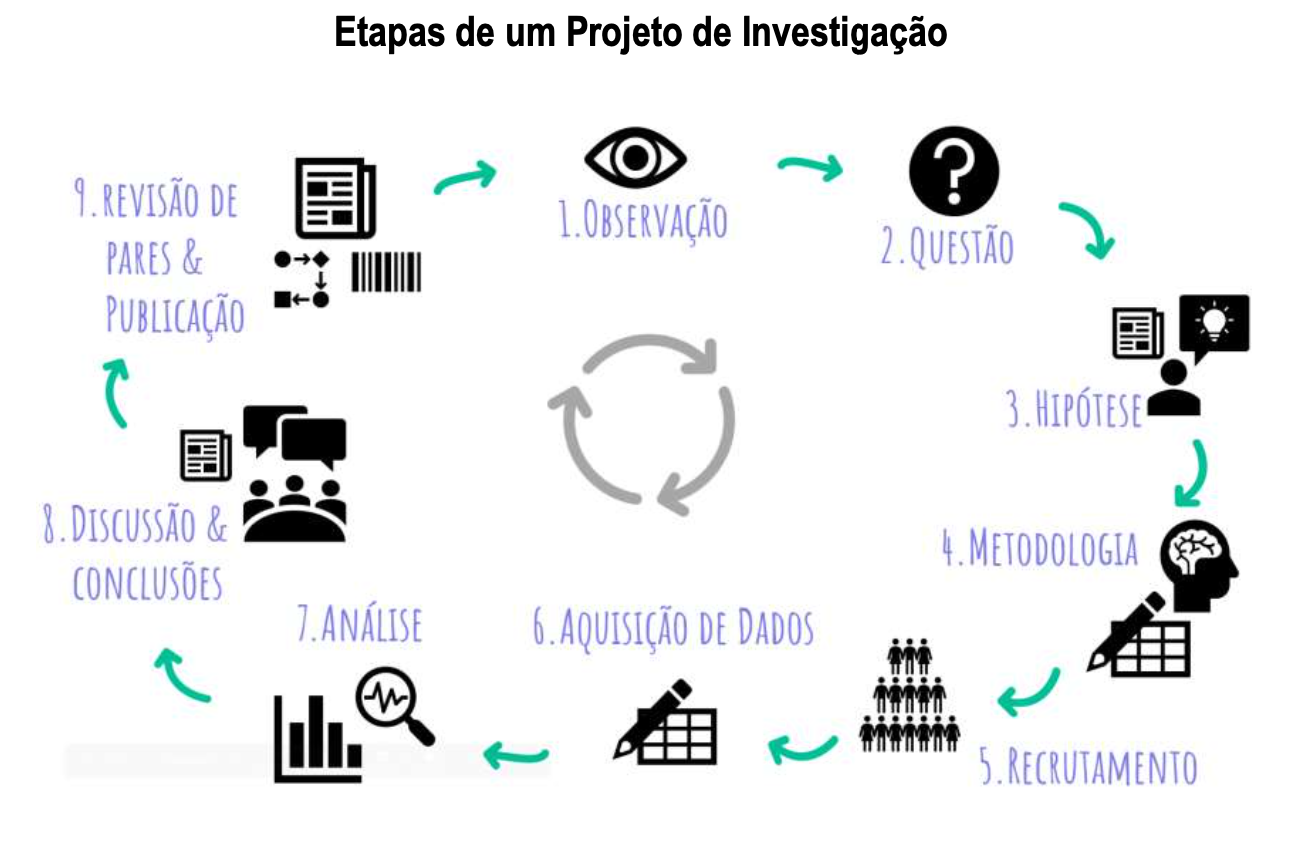

## Etapas 5, 6

Na situação pandémica actual, será mais fácil e rápido utilizar dados que outros cientistas adquiriram e disponibilizaram para toda a comunidade científica. Cada vez mais os cientistas têm a preocupação de partilhar com a comunidade os dados que adquiriram. Isto tem inúmeros benefícios, entre eles:

1.   Económico
2.   Ambiental
3.   Tempo

Por exemplo, a acquisição de imagens de ressonância magnetica é dispendiosa, requer algum tempo e consume bastante energia (a ressonância consome o equivalente a 10 aquecedores!), pelo que se pudermos (re)utilizar dados existentes é muito melhor  - gastamos menos dinheiro, é mais amigo do ambiente, e poupamos tempo! :D. 

No entanto, para que isto seja possível os dados têm de cumprir os seguintes requisitos:


1.   Localizáveis (**F**indability)
2.   Acessíveis (**A**cessibility)
3.   Interoperáveis (**I**nteroperability)
4.   Reutilizáveis (**R**eusability)

Os requisitos anteriores fazem parte de um conjunto de diretrizes que têm como objectivo facilitar a divulgação de dados de uma forma fácil e simples para que estes sejam utilizados novamente.

Lembrem-se por exemplo de quando querem comprar um produto no supermercado - têm que saber em que secção está, o artigo deve ter um códico de barras para poder ser identificado, etc.


Posto isto, e após uma pesquisa, verficámos que os dados abaixo permitiam verificar a vossa questão científica:


> [A dataset of continuous affect annotations and physiological signals for emotion analysis](https://www.nature.com/articles/s41597-019-0209-0)




### A dataset of continuous affect annotations and physiological signals for emotion analysis

Nas próxima secções iremos verificar a metodologia de aquisição dos dados, assim como explorar características dos participantes :)

Abaixo encontra-se uma fotografia da uma acquisição para um participante.

Exemplo de uma aquisição: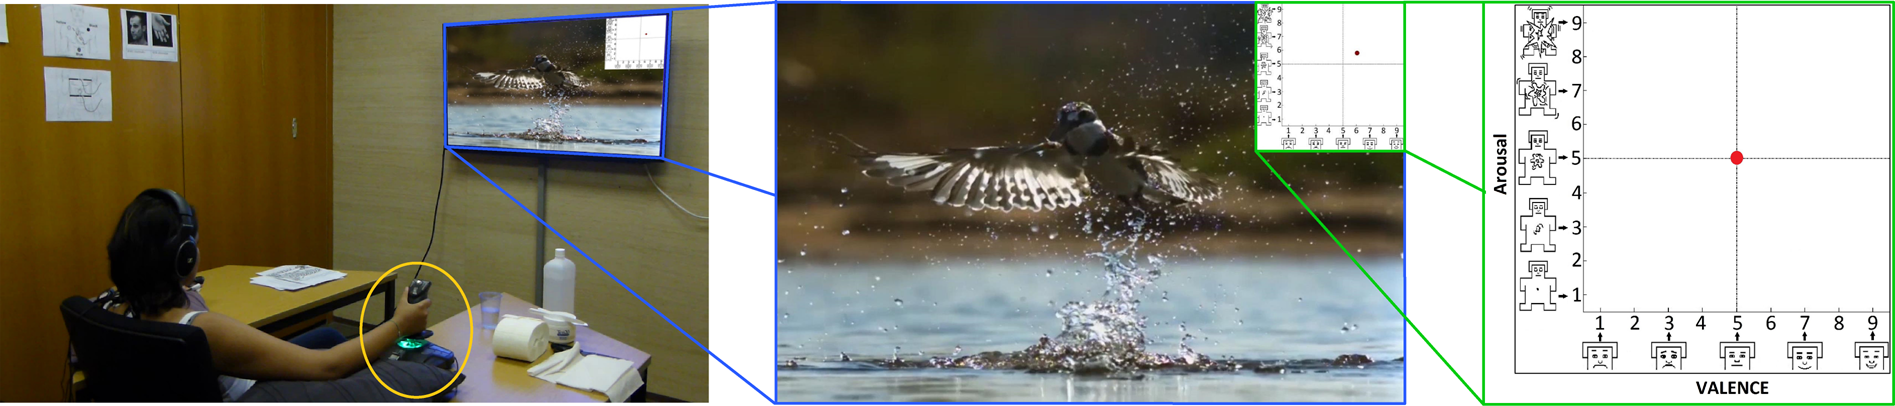

### Participantes

O estudo recrutou 30 participantes dos quais 15 elementos são do género feminino e 15 do género masculino, com idades compreendidas entre os 20 e 40 anos. Em baixo conseguem ver uma Tabela com os dados de todos os participantes:




In [ ]:
#@title
df[["Género", "Grupo de Idade"]]

Género Grupo de Idade
ID Participante                      
1                    F          30-34
2                    F          25-29
3                    F          30-34
4                    F          20-24
5                    M          20-24
6                    M          30-34
7                    M          25-29
8                    F          25-29
9                    F          20-24
10                   M          35-39
11                   M          25-29
12                   M          25-29
13                   F          25-29
14                   M          20-24
15                   F          20-24
16                   F          20-24
17                   F          20-24
18                   M          25-29
19                   F          20-24
20                   M          35-39
21                   M          20-24
22                   F          20-24
23                   M          25-29
24                   F          25-29
25                   F          25-29
26                   M          25-29
27                   M          25-29
28                   M          25-29
29                   M          25-29
30                   F          25-29

No entanto, ainda são alguns participantes, e torna-se difícil extrair informação da tabela. Por exemplo, temos o mesmo número de participantes para ambos os géneros - 15 femininos, 15 masculinos -, mas será que se dividirmos os partcicipantes por grupo de idades (e.g. 20-24, 25-29, etc) temos o mesmo número de participantes por grupo?

Grupo de Idade Género  Contagem
0          20-24      F         7
1          20-24      M         3
2          25-29      F         6
3          25-29      M         9
4          30-34      F         2
5          30-34      M         1
6          35-39      M         2

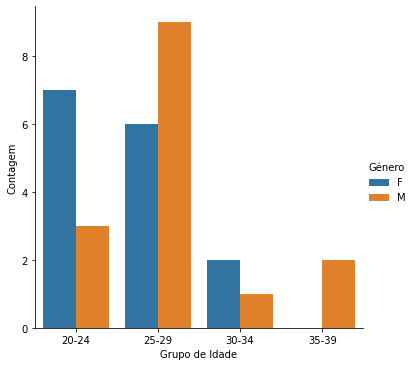

In [ ]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns

df_group = df.copy()
df_group["Contagem"] = 1
df_group = df_group.groupby(by=["Grupo de Idade", "Género"]).count().reset_index()
_ = sns.catplot(data=df_group, x="Grupo de Idade", y="Contagem", hue="Género", kind="bar")

df_group

#### Questões

1.   Porque razão os investigadores reportaram um grupo de idade em vez da idade exacta?
2.   Quais e quantos participantes é que se vão utilizar?  


#### Resposta 
[Preencher aqui]

### Dados Recolhidos
Foram utilizadas várias técnicas para recolher dados, entre elas:

*   Electrocardiograma
*   Fotopletismografia
*   Resposta galvânica da pele
*   Temperatura da pele
*   Electromiograma

Na figura abaixo podem explorar os dados recolhidos com cada uma técnicas, para um sujeito enquanto via um dos filmes do protocolo.

In [ ]:
#@title

def plot_signals_acquired(sinal):

  subject_id = 3
  video_id = 3
  fig = plt.figure(figsize=(20,5))
  
  df_sub = df_data[(df_data["subject"] == subject_id)&(df_data["video"] == video_id)]
  time_axis = np.asarray(range(len(df_sub["emg_zygo"])))*0.1/60

  if sinal == "Electrocardiograma":
    plt.plot(time_axis, df_sub["ecg"])

  elif sinal == "Fotopletismografia":
    plt.plot(time_axis, df_sub["bvp"])

  elif sinal == "Resposta galvânica da pele":
    plt.plot(time_axis, df_sub["gsr"])

  elif sinal == "Temperatura da pele":
    plt.plot(time_axis, df_sub["skt"])

  elif sinal == "Electromiograma":
    plt.plot(time_axis, df_sub["emg_zygo"])
  
  plt.xlabel("Tempo (min)")
  plt.title(f'ID do participante {subject_id}')

signals = ["Electrocardiograma", "Fotopletismografia", "Resposta galvânica da pele", "Temperatura da pele", "Electromiograma"]
interact(plot_signals_acquired, sinal=signals);


interactive(children=(Dropdown(description='sinal', options=('Electrocardiograma', 'Fotopletismografia', 'Resp…

#### Questão 
Quais os sinais que devemos usar para conseguir responder à nossa questão de investigação?

#### Resposta
[Preencher aqui]

### Filmes
Cada participante assistiu a oito filmes de 4 categorias distintas (dois por categoria):

**Divertido**:
*   When Harry Met Sally (1989)
*   Hangover (2009)

**Aborrecido**:
*   Matcha: The way of Tea (2012)
*   Europe Travel Skills (2013) 

**Relaxado**:
*   Relaxing Music with Beach (2011)
*   Natural World: Zambezi (2012)

**Assustador**:
*   Shutter (2004)
*   Mama (2008)


#### Questão
Tendo em conta a vossa hipótese que categorias fazem sentido utilizar? E qual o filme que melhor representa a categoria?

#### Resposta
[Preencher aqui]